# Sobre o Conjunto de Dados
- O conjunto de dados se refere a mortalidade por doença cardíaca ou ataque cardíaco, os dados contêm o histórico dos pacientes, idade, sexo, se ele fuma, se tem diabetes, colesterol, entre outras. O conjunto pede para criar um modelo que preveja a morte por insuficiência cardíaca.
- Mas, primeiro o conjunto de dados vai passar por um EDA e assim irei criar modelos para a previsão e escolher o melhor resultado.

# Importando Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, MinMaxScaler

from sklearn.model_selection import train_test_split, GridSearchCV

## ML
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier,ExtraTreesClassifier
from sklearn.metrics import confusion_matrix, classification_report

## balanceado
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Carregando Dados

In [ ]:
dados = pd.read_csv('/content/FIC.Full CSV.csv')

# Informações dos Dados

In [ ]:
dados.head()

,Age,Age.Group,Gender,Locality,Marital status,Life.Style,Sleep,Category,Depression,Hyperlipi,...,oldpeak,slope,ca,thal,num,SK,SK.React,Reaction,Mortality,Follow.Up
0,45,41-50,Female,RURAL,MARRIED,NO,NO,FREE,YES,YES,...,3.0,2,0,7,2,1,NO,0,0,60
1,51,51-60,Female,URBAN,MARRIED,NO,NO,FREE,YES,YES,...,1.2,2,0,7,2,1,NO,0,0,15
2,55,51-60,Female,RURAL,MARRIED,YES,YES,FREE,YES,YES,...,3.4,2,0,3,2,1,NO,0,0,6
3,55,51-60,Female,RURAL,MARRIED,YES,YES,FREE,YES,YES,...,2.0,2,1,7,3,1,NO,0,0,52
4,56,51-60,Female,RURAL,MARRIED,YES,NO,FREE,YES,YES,...,4.0,3,2,7,3,1,NO,0,0,34


In [ ]:
print('Tamanho de Dados:', dados.shape)
print('Dados Duplicados:', dados.duplicated().sum())
tabela = pd.DataFrame({
    'Unique':dados.nunique(),
    'Null':dados.isna().sum(),
    'NullPercent':dados.isna().sum() / len(dados),
    'Type':dados.dtypes.values
})
tabela

Tamanho de Dados: (368, 60)
Dados Duplicados: 214


,Unique,Null,NullPercent,Type
Age,31,0,0.0,int64
Age.Group,5,0,0.0,object
Gender,2,0,0.0,object
Locality,2,0,0.0,object
Marital status,2,0,0.0,object
Life.Style,2,0,0.0,object
Sleep,2,0,0.0,object
Category,2,0,0.0,object
Depression,2,0,0.0,object
Hyperlipi,2,0,0.0,object


In [ ]:
dados.columns

Index(['Age', 'Age.Group', 'Gender', 'Locality  ',
       'Marital status                       ',
       'Life.Style                                                                              ',
       'Sleep', 'Category', 'Depression', 'Hyperlipi', 'Smoking',
       'Family.History', 'F.History', 'Diabetes', 'HTN', 'Allergies', 'BP',
       'Thrombolysis', 'BGR', 'B.Urea', 'S.Cr', 'S.Sodium', 'S.Potassium',
       'S.Chloride', 'C.P.K', 'CK.MB', 'ESR', 'WBC', 'RBC', 'Hemoglobin',
       'P.C.V', 'M.C.V', 'M.C.H', 'M.C.H.C', 'PLATELET_COUNT', 'NEUTROPHIL',
       'LYMPHO', 'MONOCYTE', 'EOSINO', 'Others ', 'CO', 'Diagnosis',
       'Hypersensitivity', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num', 'SK',
       'SK.React', 'Reaction', 'Mortality', 'Follow.Up'],
      dtype='object')

- Vemos que algumas colunas estão com espaçamento, como no caso do 'Locality', 'Marital status' e 'Life.Style', irei apenas modificar as colunas usando o método rename.

# Gráfico dos Dados

In [ ]:
dados.columns

Index(['Age', 'Age.Group', 'Gender', 'Locality  ',
       'Marital status                       ',
       'Life.Style                                                                              ',
       'Sleep', 'Category', 'Depression', 'Hyperlipi', 'Smoking',
       'Family.History', 'F.History', 'Diabetes', 'HTN', 'Allergies', 'BP',
       'Thrombolysis', 'BGR', 'B.Urea', 'S.Cr', 'S.Sodium', 'S.Potassium',
       'S.Chloride', 'C.P.K', 'CK.MB', 'ESR', 'WBC', 'RBC', 'Hemoglobin',
       'P.C.V', 'M.C.V', 'M.C.H', 'M.C.H.C', 'PLATELET_COUNT', 'NEUTROPHIL',
       'LYMPHO', 'MONOCYTE', 'EOSINO', 'Others ', 'CO', 'Diagnosis',
       'Hypersensitivity', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num', 'SK',
       'SK.React', 'Reaction', 'Mortality', 'Follow.Up'],
      dtype='object')

In [ ]:
'''
Como podemos ver as colunas estão com espaçamento entre elas, a coluna 'Locality', 'Marital status' e 'Life.Style'
para não haver algum problema com o uso delas, irei renomear cada uma.
'''
# renomeando as colunas
dados = dados.rename(columns={'Locality  ':'Locality', 'Marital status                       ':'Marital status',
                              'Life.Style                                                                              ':'Life.Style'})

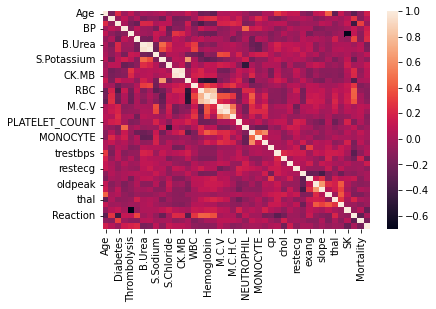

In [ ]:
corre = dados.corr()
sns.heatmap(corre, annot=False)

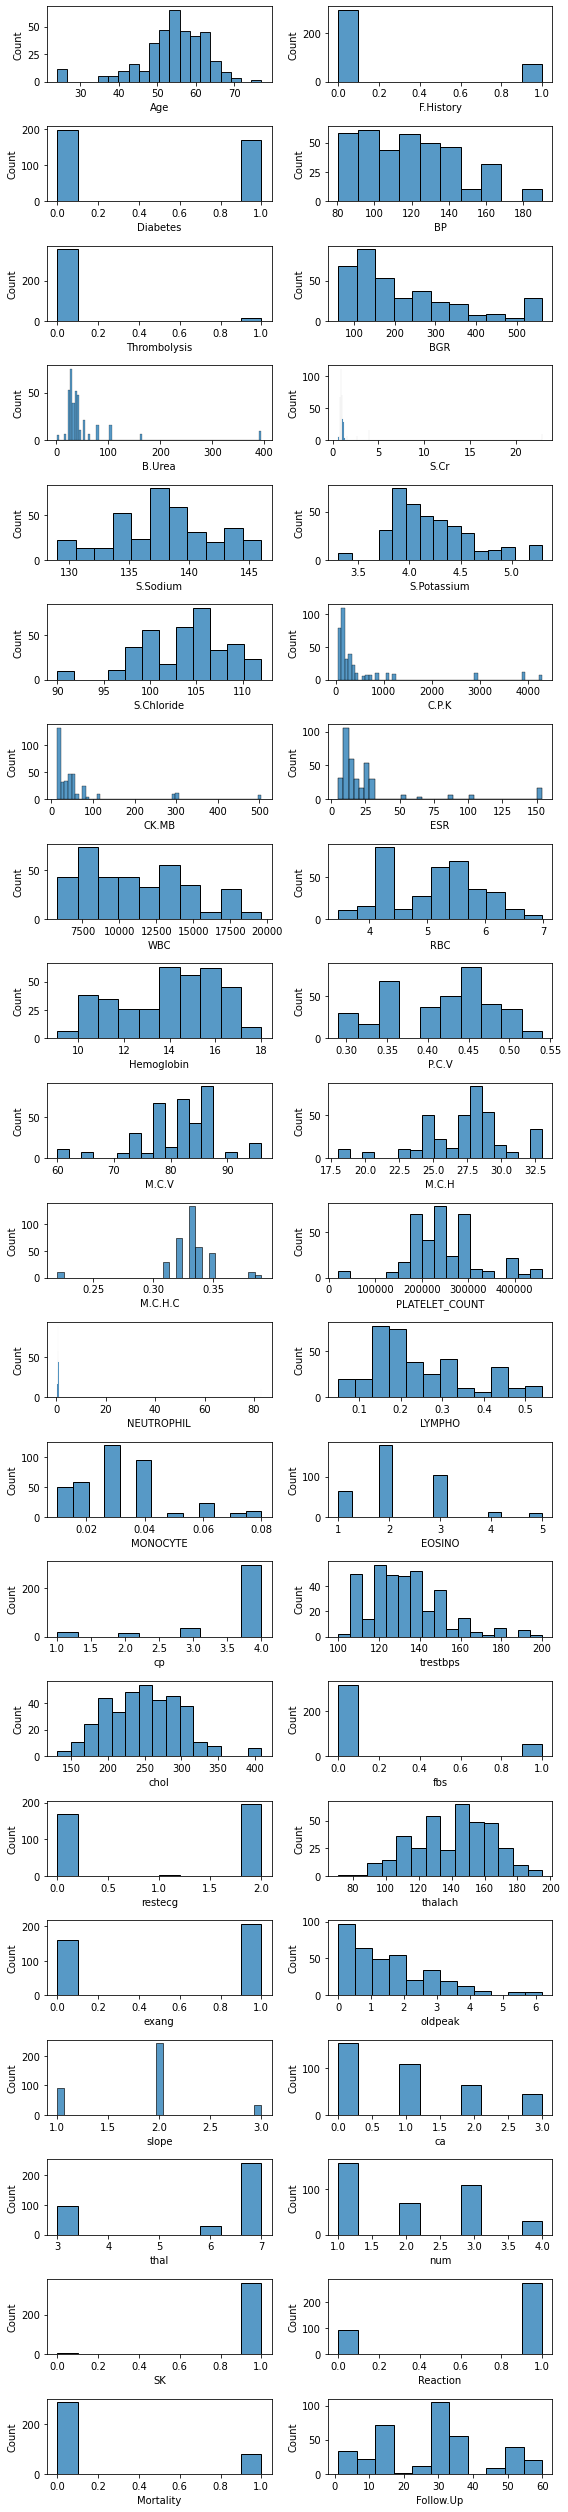

In [ ]:
num = dados.select_dtypes(exclude='O')

## gráfico de histograma
plt.figure(figsize=(8,35))
for i, col in enumerate(num.columns):
        ax = plt.subplot(21, 2, i+1)
        sns.histplot(num[col], ax=ax)
        plt.xlabel(col)
plt.tight_layout()        
plt.show()

- Visualizando o gráfico de histograma nos dados numéricos, podemos ver o  desequilibrio de dados nas colunas 'Mortality', 'Reaction', 'SK', 'F.History','Thrombolysis','fbs'.

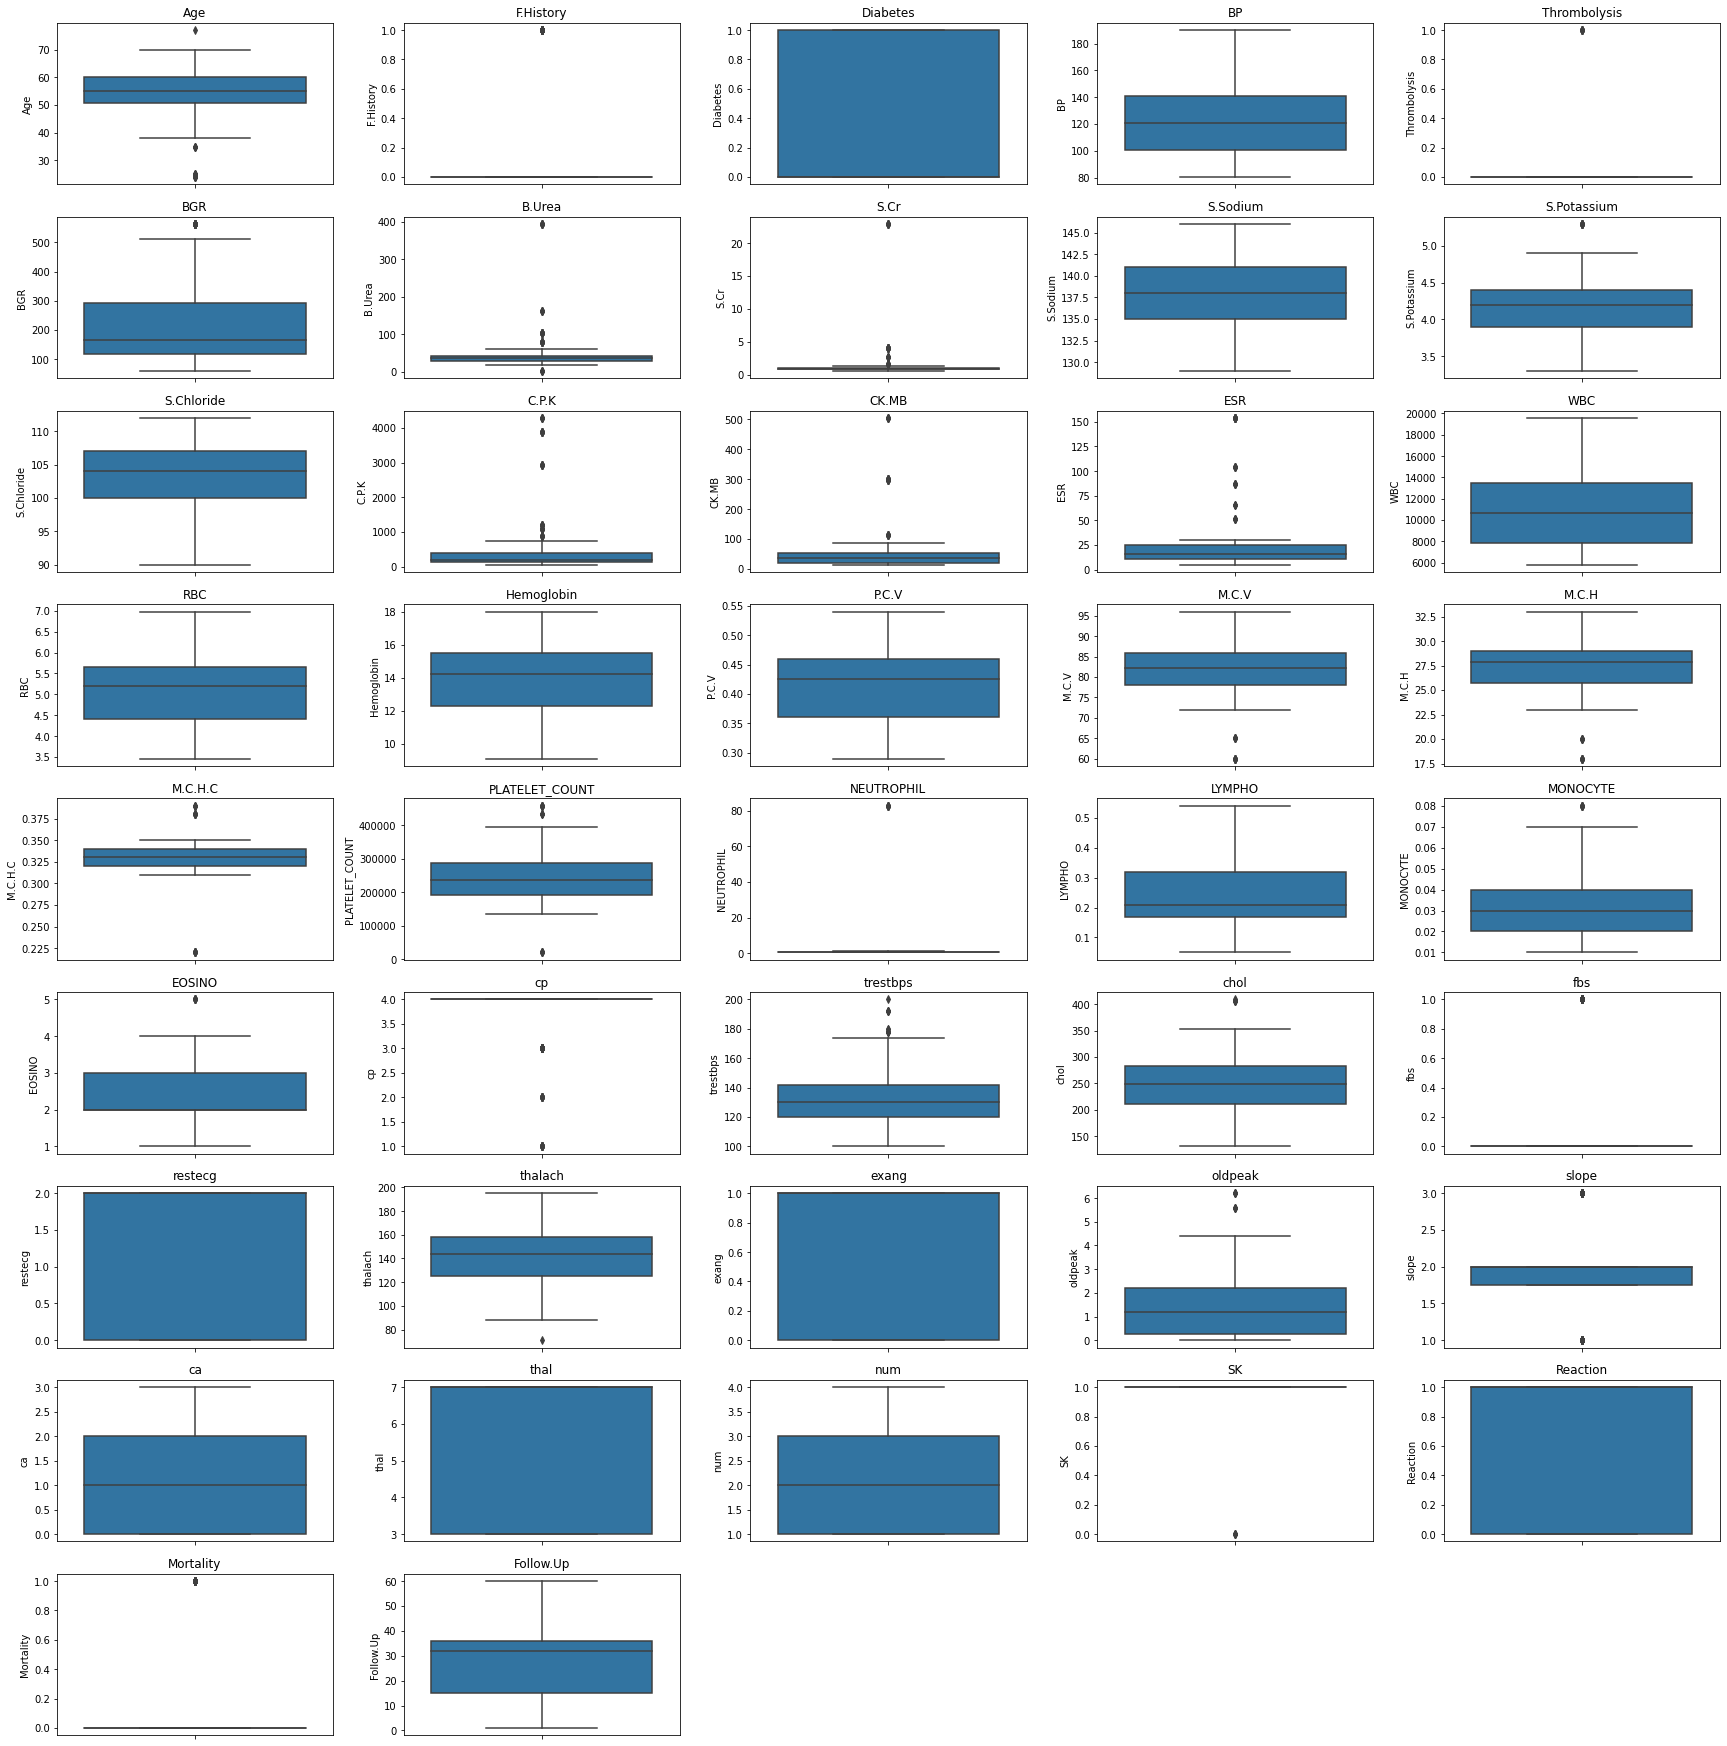

In [ ]:
num = dados.select_dtypes(exclude='O')

# gráfico Box 
plt.figure(figsize=(24,27))
for i,col in enumerate(num):
 
  ax = plt.subplot(10, 5, i+1)
  sns.boxplot(y=num[col])
  plt.title(col)
plt.tight_layout()
plt.show()

In [ ]:
## colunas com valores menores que 10 
for col in dados.columns:
  if dados[col].nunique() <=10 :
    print(col)

Age.Group
Gender
Locality
Marital status
Life.Style
Sleep
Category
Depression
Hyperlipi
Smoking
Family.History
F.History
Diabetes
HTN
Allergies
Thrombolysis
M.C.H.C
MONOCYTE
EOSINO
Hypersensitivity
cp
fbs
restecg
exang
slope
ca
thal
num
SK
SK.React
Reaction
Mortality


- Verificando a relação do grupo de idade com outras colunas.



In [ ]:
colunas = ['Age.Group',
'Gender',
'Locality',  
'Marital status',                    
'Life.Style' ,                                                                           
'Sleep',
'Category',
'Depression',
'Hyperlipi',
'Smoking',
'Family.History',
'F.History',
'Diabetes',
'HTN',
'Allergies',
'Thrombolysis',
'M.C.H.C',
'MONOCYTE',
'EOSINO',
'Hypersensitivity',
'cp',
'fbs',
'restecg',
'exang',
'slope',
'ca',
'thal',
'num',
'SK',
'SK.React',
'Reaction',
'Mortality']

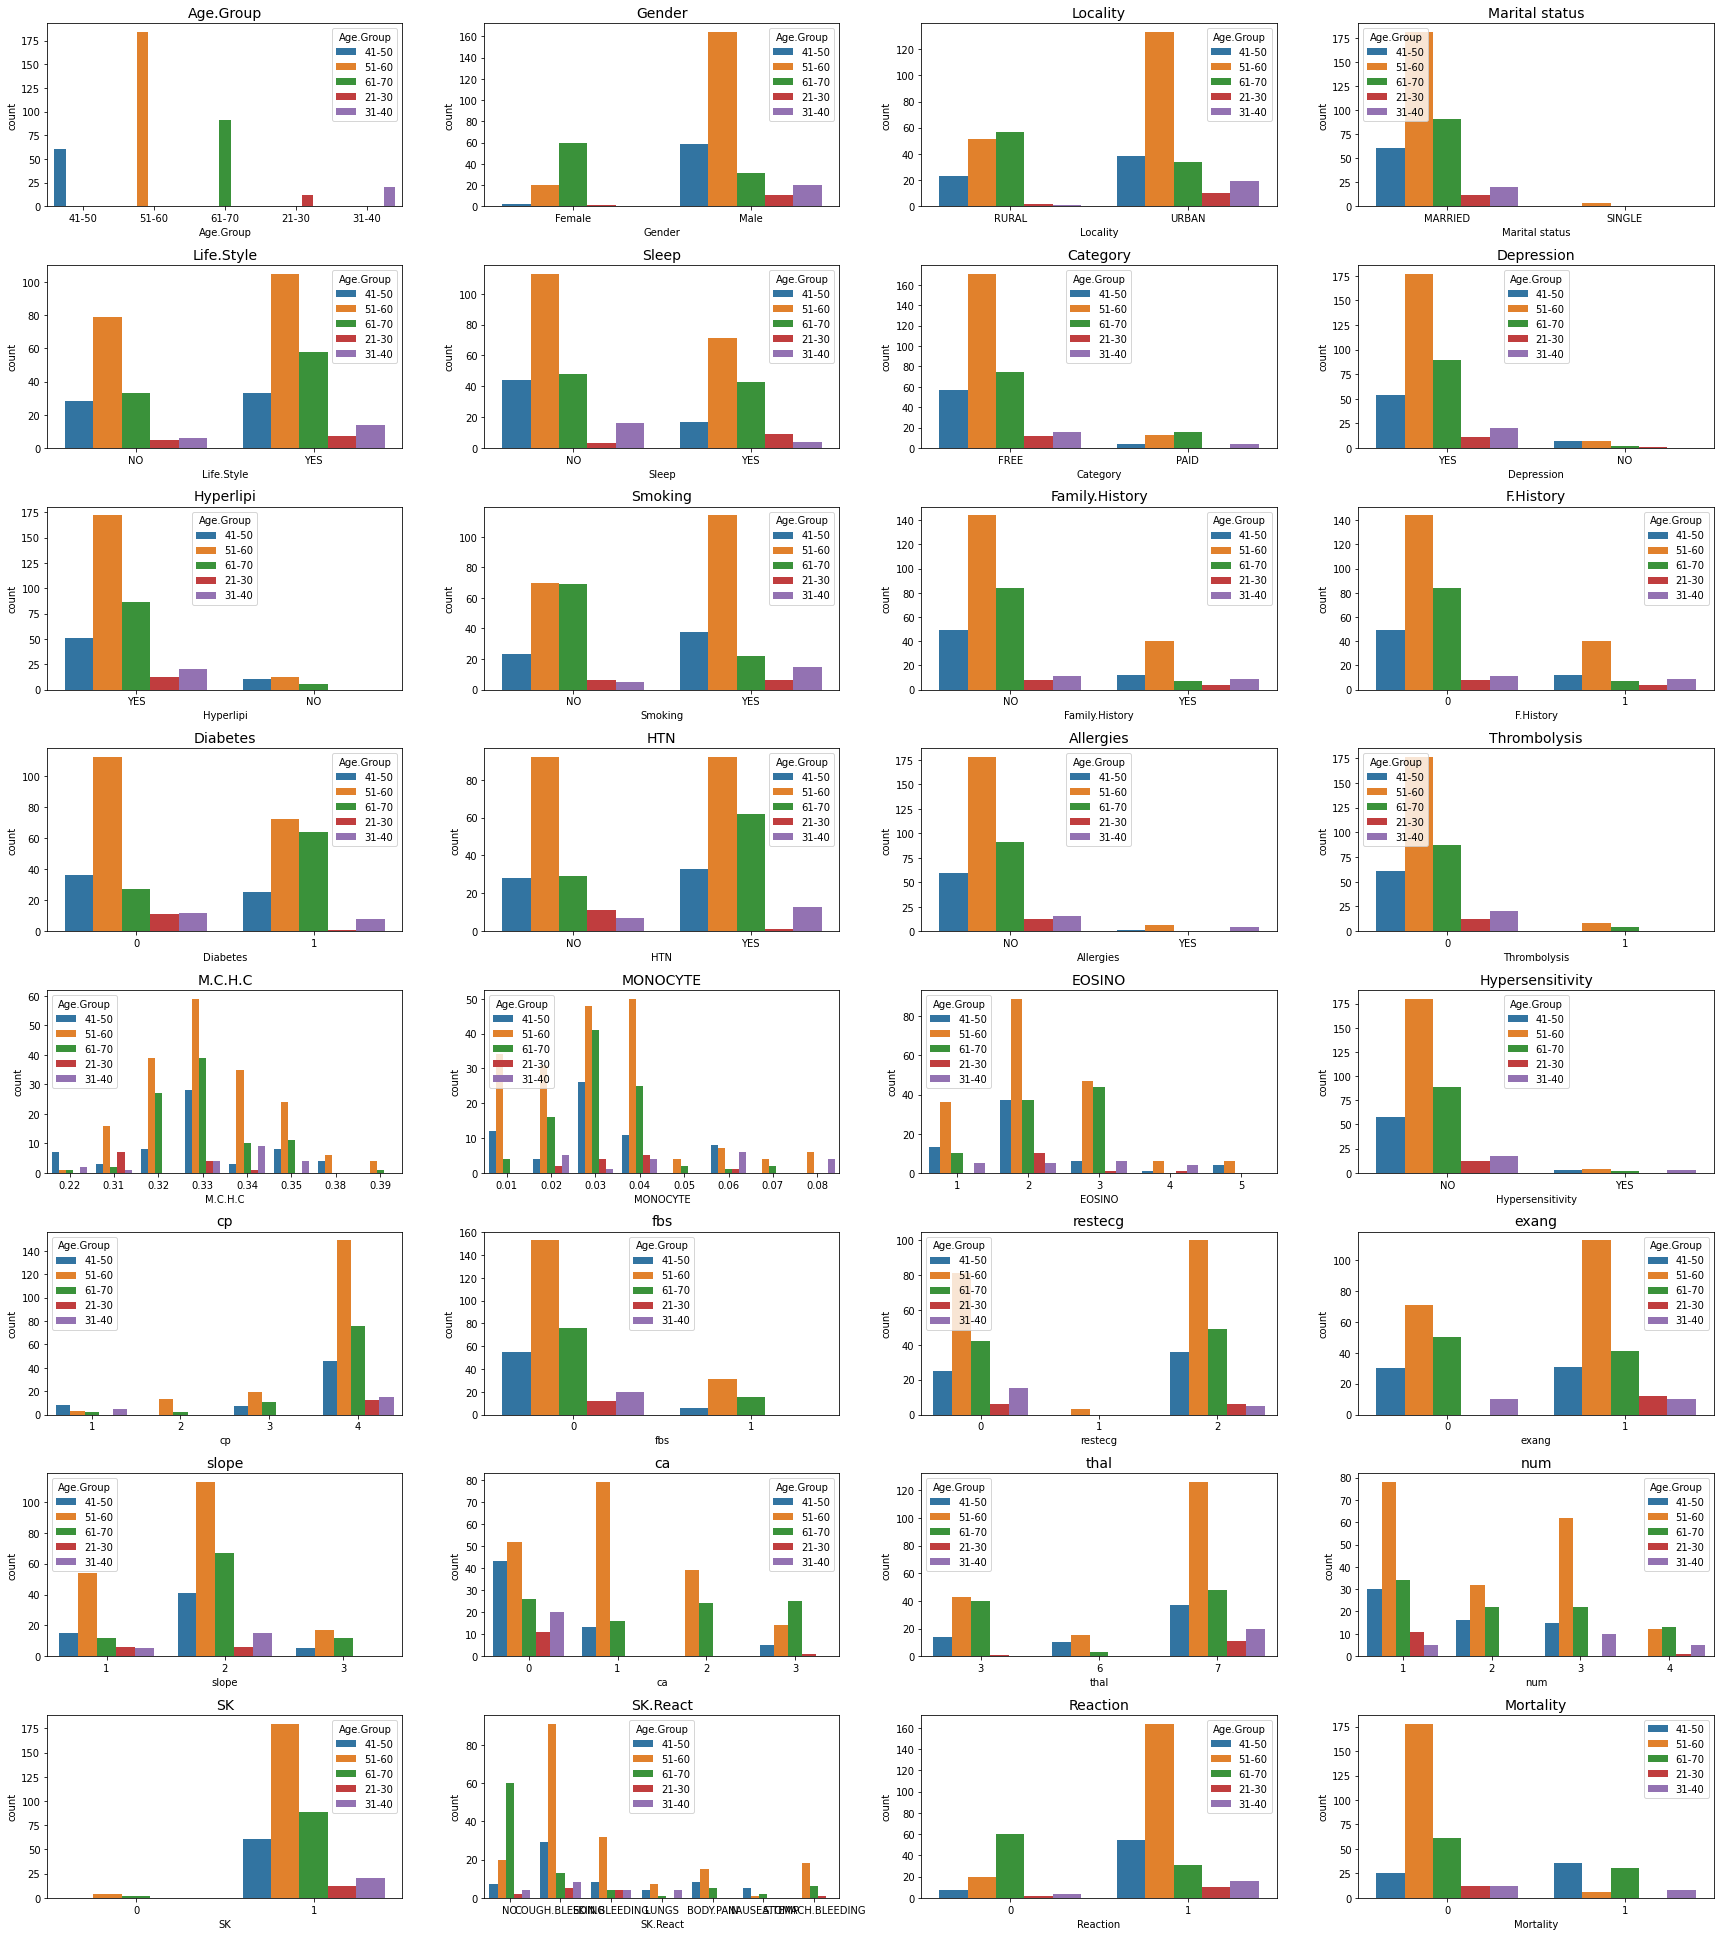

In [ ]:
plt.figure(figsize=(24,27))
for i, col in enumerate(dados[colunas]):
  ax = plt.subplot(8,4,i+1)
  sns.countplot(x=dados[col], hue=dados['Age.Group'], ax=ax)
  plt.title(col, fontsize=14)

plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

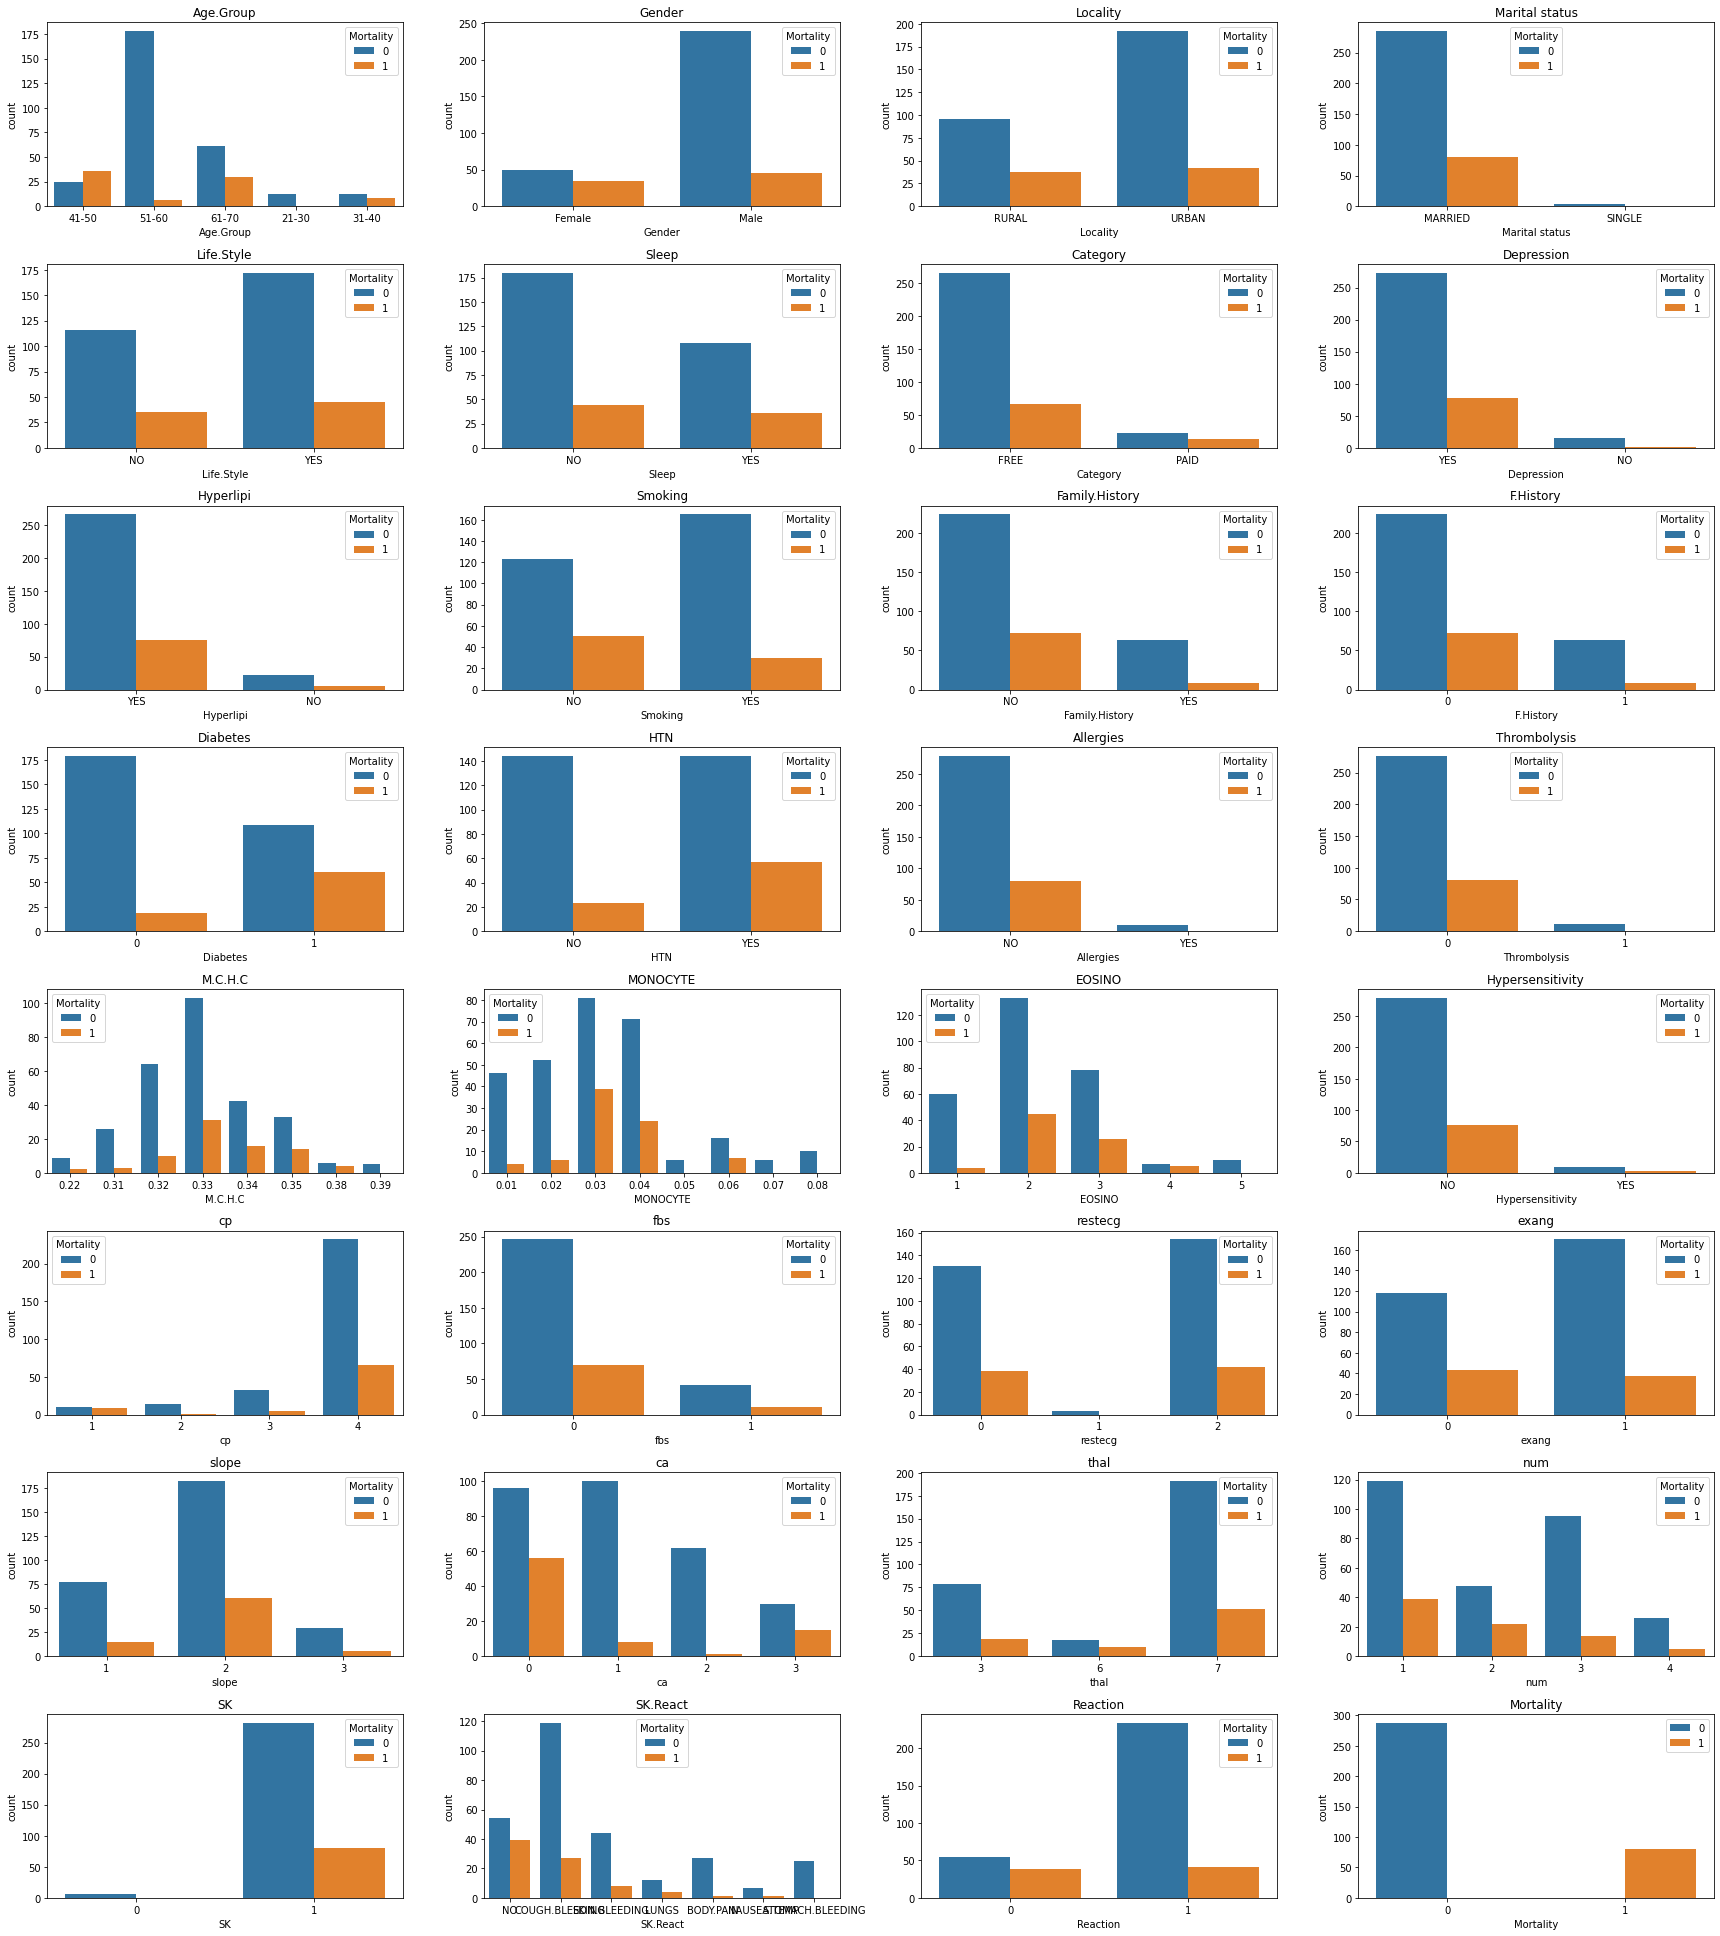

In [ ]:
# relação da coluna Mortality com outras colunas
plt.figure(figsize=(24,27))
for i, col in enumerate(dados[colunas]):
    ax = plt.subplot(8,4,i+1)
    sns.countplot(x=dados[col], hue=dados['Mortality'],ax=ax)
    plt.title(col)
  
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

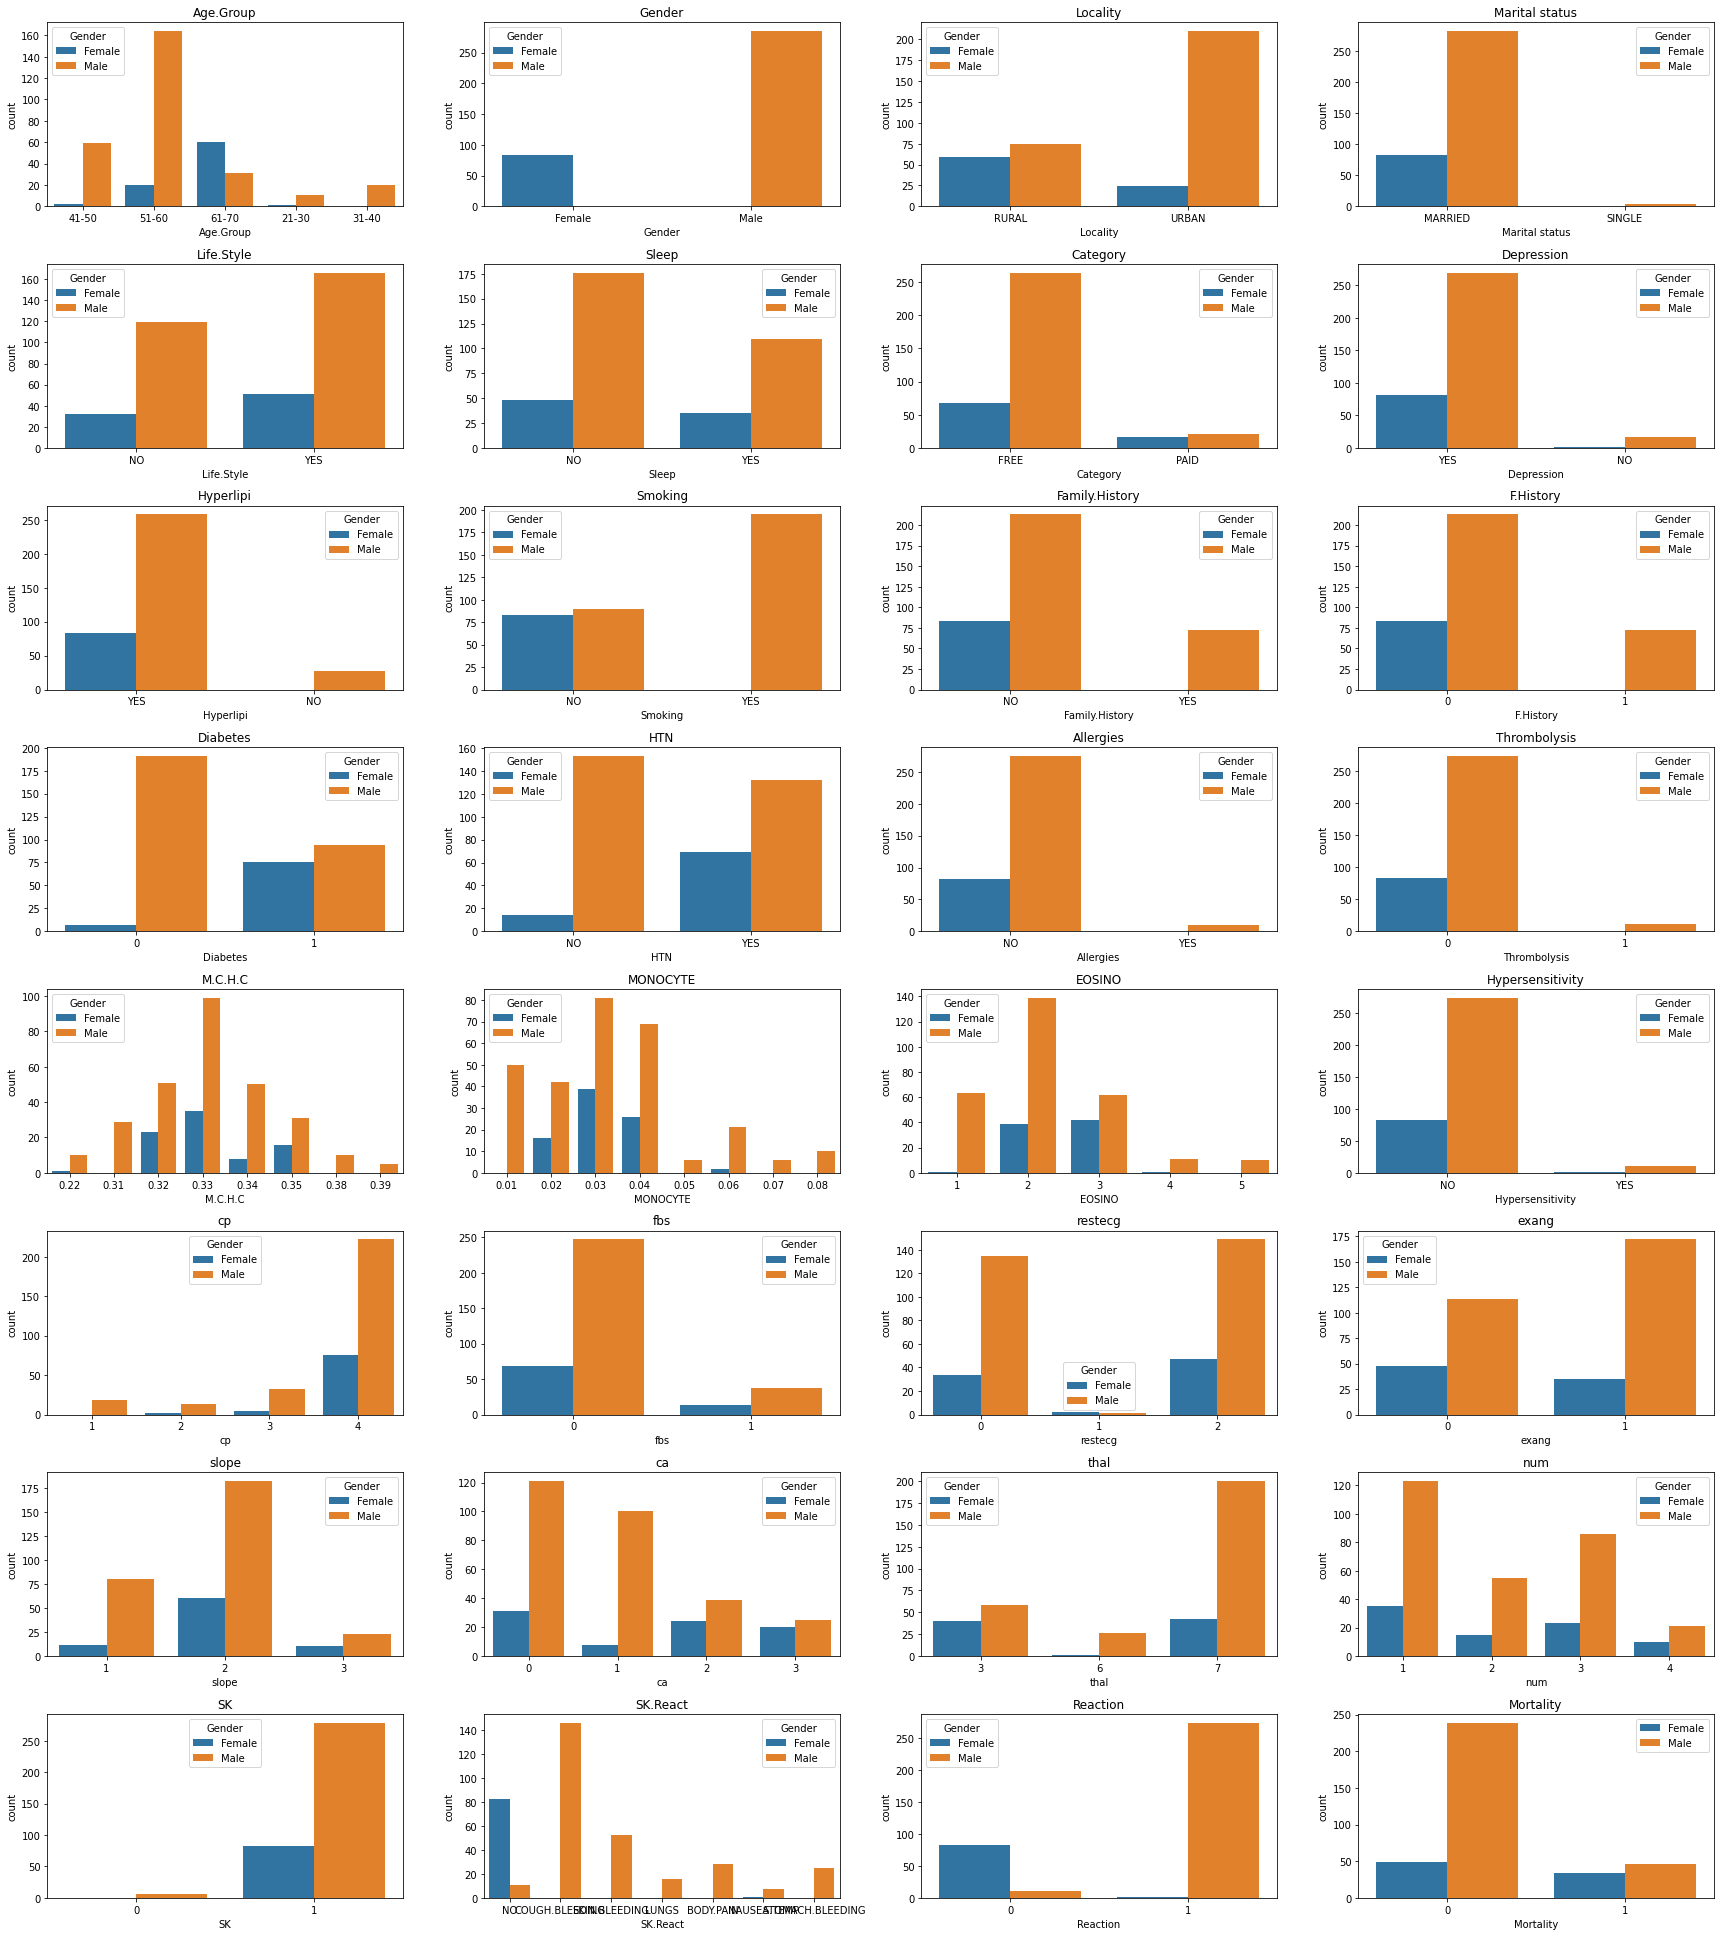

In [ ]:
# Relação de gêneros com outras colunas
plt.figure(figsize=(24,27))
for i, col in enumerate(dados[colunas]):
    ax = plt.subplot(8,4,i+1)
    sns.countplot(x=dados[col], hue=dados['Gender'],ax=ax)
    plt.title(col)

plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

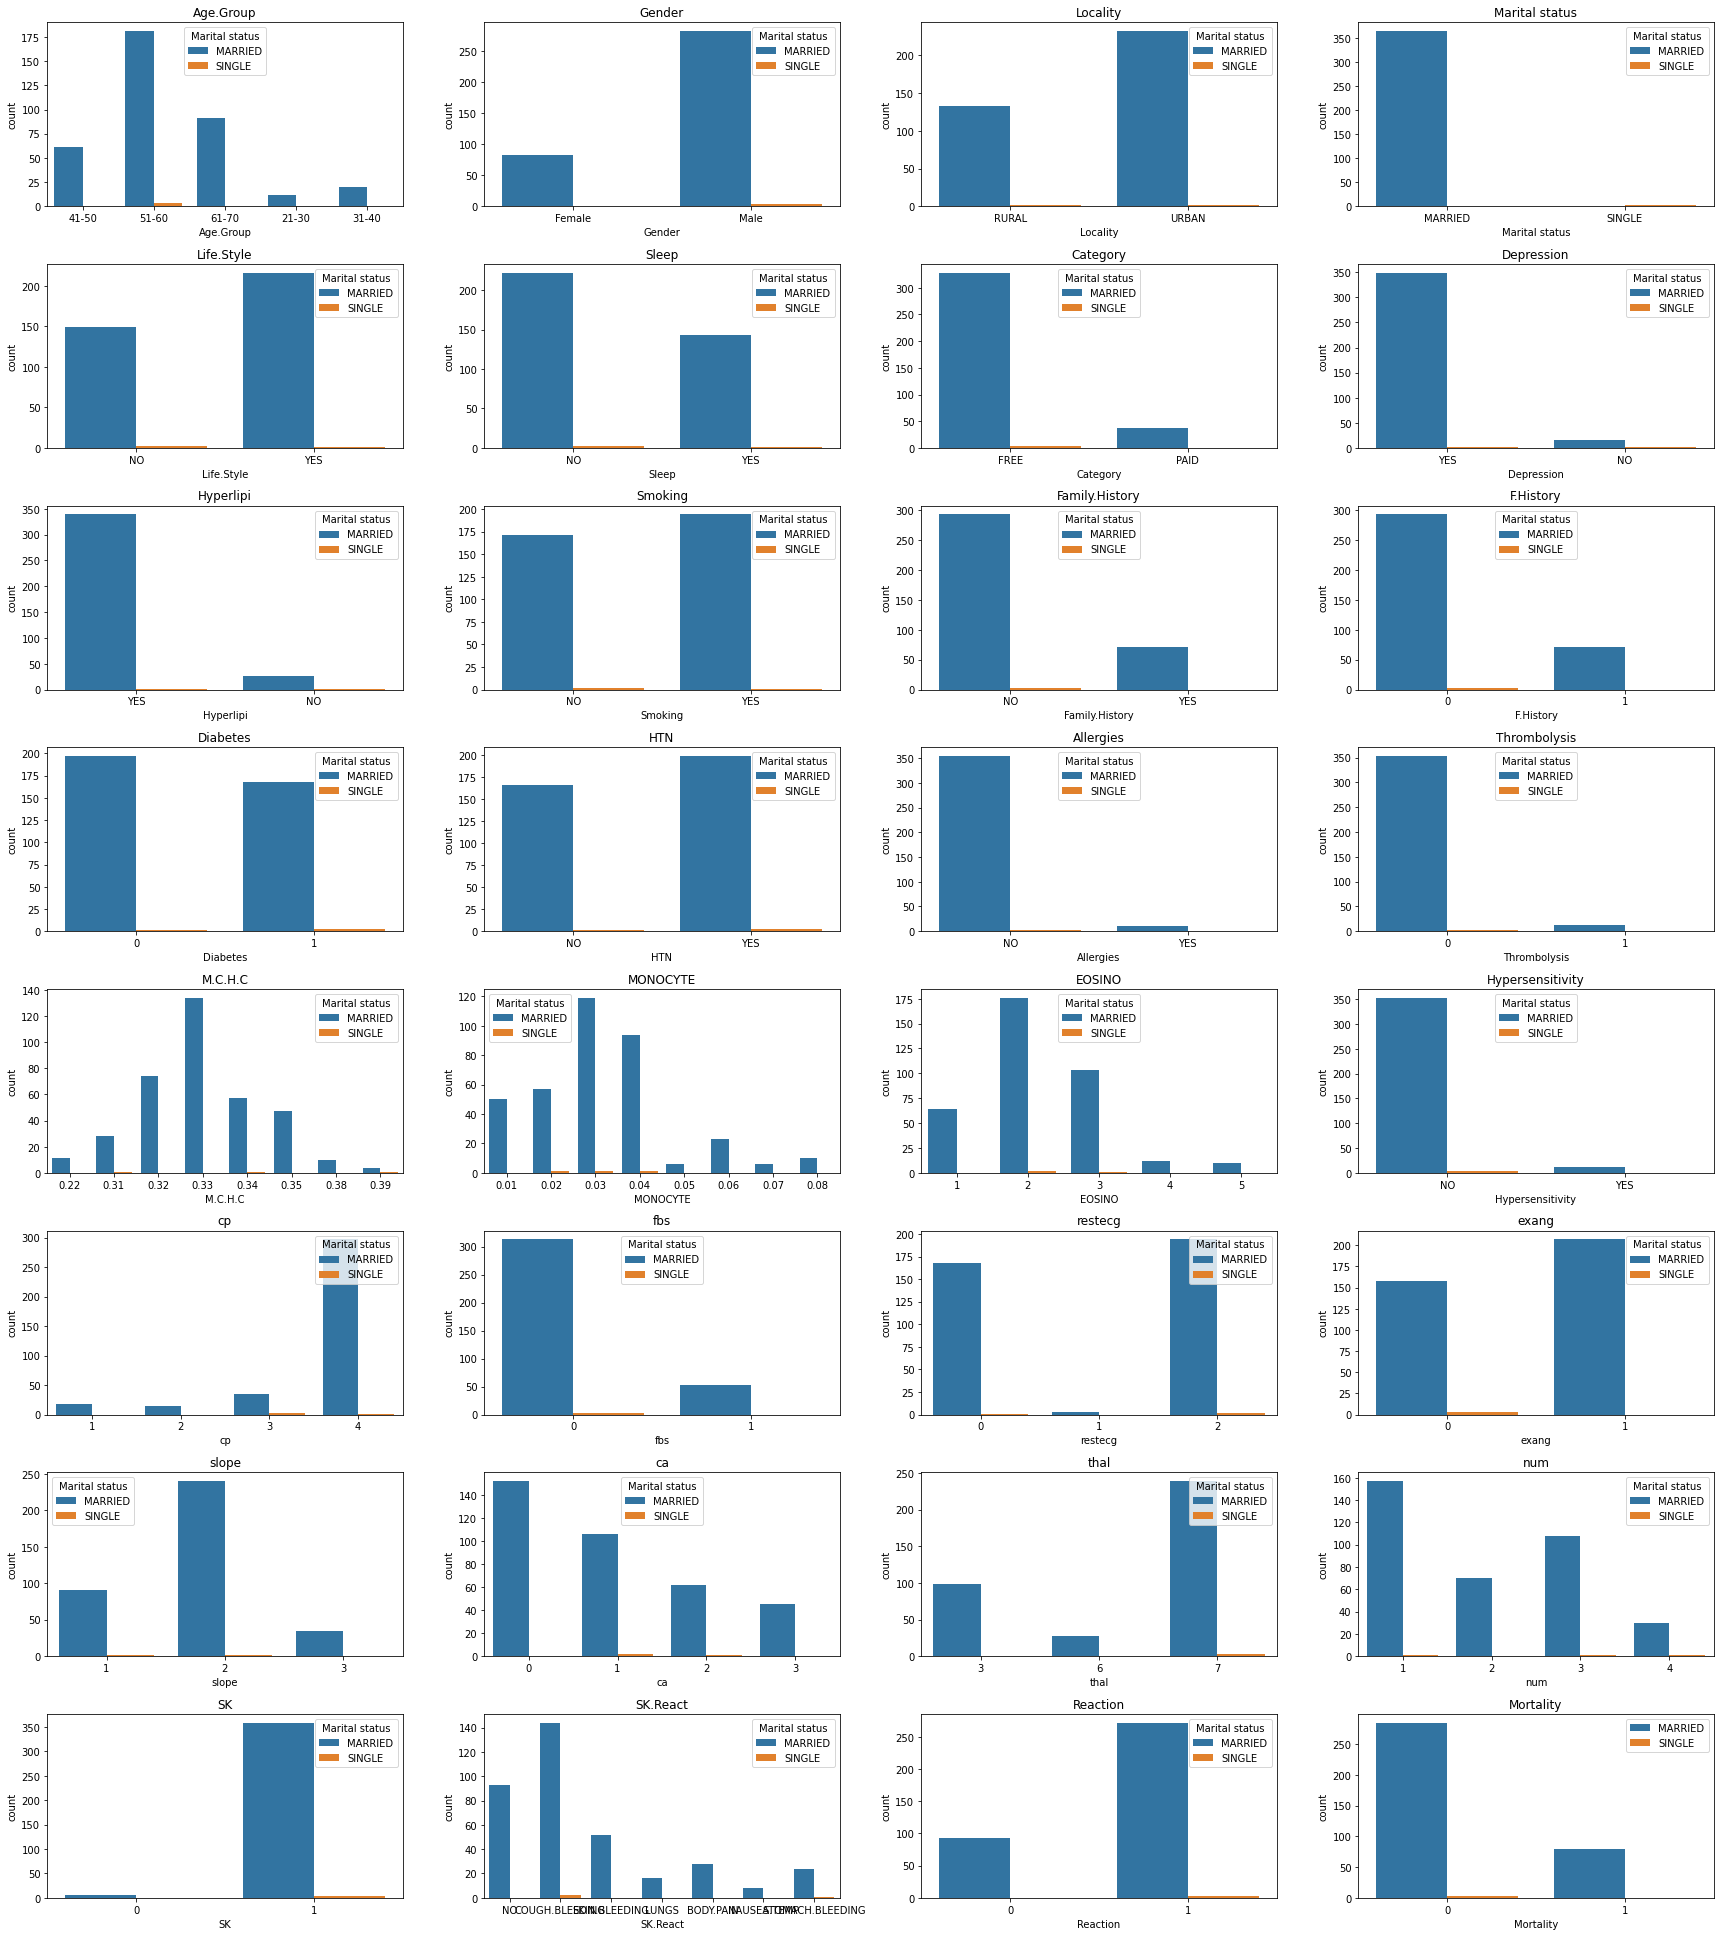

In [ ]:
# Relação de estado civil com outras colunas
plt.figure(figsize=(24,27))
for i, col in enumerate(dados[colunas]):
    ax = plt.subplot(8,4,i+1)
    sns.countplot(x=dados[col], hue=dados['Marital status'],ax=ax)
    plt.title(col)

plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

# Transformando os Dados

In [ ]:
dados.drop_duplicates(inplace=True)

In [ ]:
## Daqui irei usar um novo dataframe para usá-lo nos modelos de classificação
df = dados.copy()

In [ ]:
cat = df.select_dtypes(include='O')

for c in cat:
  if c != 'Age.Group':
    df[c] = df[c].apply(lambda text: text.lower())

In [ ]:
for i in df.columns:
  if df[i].nunique() <= 2:
    print(df[i].value_counts())
    print()

male      127
female     27
Name: Gender, dtype: int64

urban    96
rural    58
Name: Locality  , dtype: int64

married    151
single       3
Name: Marital status                       , dtype: int64

yes    86
no     68
Name: Life.Style                                                                              , dtype: int64

no     98
yes    56
Name: Sleep, dtype: int64

free    143
paid     11
Name: Category, dtype: int64

yes    145
no       9
Name: Depression, dtype: int64

yes    140
no      14
Name: Hyperlipi, dtype: int64

yes    87
no     67
Name: Smoking, dtype: int64

no     124
yes     30
Name: Family.History, dtype: int64

0    124
1     30
Name: F.History, dtype: int64

0    91
1    63
Name: Diabetes, dtype: int64

yes    78
no     76
Name: HTN, dtype: int64

no     150
yes      4
Name: Allergies, dtype: int64

0    146
1      8
Name: Thrombolysis, dtype: int64

no     144
yes     10
Name: Hypersensitivity, dtype: int64

0    131
1     23
Name: fbs, dtype: int64

1    8

In [ ]:
df.replace({'yes':1, 'no':0, 'free':1, 'paid':0, 'married':1, 'single':0, 'female':1, 'male':0, 'urban':1, 'rural':0}, inplace=True)

In [ ]:
df

,Age,Age.Group,Gender,Locality,Marital status,Life.Style,Sleep,Category,Depression,Hyperlipi,...,oldpeak,slope,ca,thal,num,SK,SK.React,Reaction,Mortality,Follow.Up
0,45,41-50,1,0,1,0,0,1,1,1,...,3.0,2,0,7,2,1,0,0,0,60
1,51,51-60,1,1,1,0,0,1,1,1,...,1.2,2,0,7,2,1,0,0,0,15
2,55,51-60,1,0,1,1,1,1,1,1,...,3.4,2,0,3,2,1,0,0,0,6
3,55,51-60,1,0,1,1,1,1,1,1,...,2.0,2,1,7,3,1,0,0,0,52
4,56,51-60,1,0,1,1,0,1,1,1,...,4.0,3,2,7,3,1,0,0,0,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,47,41-50,0,0,1,1,0,1,1,1,...,0.0,1,1,3,2,1,0,0,1,29
150,50,41-50,1,0,1,0,0,1,1,1,...,0.0,1,1,3,1,1,nausea.temp,1,1,2
151,50,41-50,0,1,1,0,0,1,1,1,...,2.8,3,0,6,2,1,0,0,1,19
152,50,41-50,0,1,1,0,0,1,0,0,...,0.0,2,3,7,3,1,0,0,1,6


In [ ]:
df.dtypes

Age                                                                                           int64
Age.Group                                                                                    object
Gender                                                                                        int64
Locality                                                                                      int64
Marital status                                                                                int64
Life.Style                                                                                    int64
Sleep                                                                                         int64
Category                                                                                      int64
Depression                                                                                    int64
Hyperlipi                                                                                     int64


In [ ]:
# Aqui transformando os valores categóricos em colunas
cat = df.select_dtypes(include='O')

df = pd.get_dummies(df, columns=[col for col in df.columns if col in cat])

In [ ]:
df

,Age,Gender,Locality,Marital status,Life.Style,Sleep,Category,Depression,Hyperlipi,Smoking,...,"Diagnosis_severe mr, mvr",Diagnosis_st-t elevation post sk,Diagnosis_stemi,SK.React_0,SK.React_body.pain,SK.React_cough.bleeding,SK.React_lungs,SK.React_nausea.temp,SK.React_skin.bleeding,SK.React_stomach.bleeding
0,45,1,0,1,0,0,1,1,1,0,...,0,0,0,1,0,0,0,0,0,0
1,51,1,1,1,0,0,1,1,1,0,...,0,0,0,1,0,0,0,0,0,0
2,55,1,0,1,1,1,1,1,1,0,...,0,0,0,1,0,0,0,0,0,0
3,55,1,0,1,1,1,1,1,1,0,...,0,0,0,1,0,0,0,0,0,0
4,56,1,0,1,1,0,1,1,1,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,47,0,0,1,1,0,1,1,1,1,...,0,0,0,1,0,0,0,0,0,0
150,50,1,0,1,0,0,1,1,1,0,...,0,0,0,0,0,0,0,1,0,0
151,50,0,1,1,0,0,1,1,1,0,...,0,0,0,1,0,0,0,0,0,0
152,50,0,1,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
df.shape

(154, 155)

# Preparação dos Dados

### Separando os dados para o treino e teste

In [ ]:
y = df.Mortality
x = df.drop(['Mortality'],axis=1)

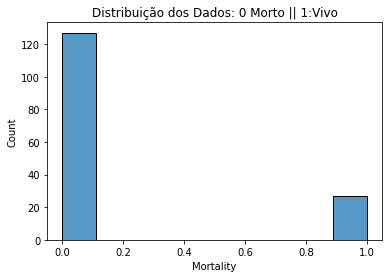

In [ ]:
sns.histplot(x=y)
plt.title('Distribuição dos Dados: 0 Morto || 1:Vivo')
plt.show()

### Dados Desbalanceados

In [ ]:
## Usando o pipeline entre o over e under sampler para balancear os dados x e y
from imblearn.pipeline import Pipeline

under = RandomUnderSampler()
over = RandomOverSampler()

pipeline = Pipeline(steps=[('o',over),('u', under)])

## com scaler
x, y = pipeline.fit_resample(x, y)

### Treinamento do X e Y

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [ ]:
x_train.head()

,Age,Gender,Locality,Marital status,Life.Style,Sleep,Category,Depression,Hyperlipi,Smoking,...,"Diagnosis_severe mr, mvr",Diagnosis_st-t elevation post sk,Diagnosis_stemi,SK.React_0,SK.React_body.pain,SK.React_cough.bleeding,SK.React_lungs,SK.React_nausea.temp,SK.React_skin.bleeding,SK.React_stomach.bleeding
38,52,0,0,1,1,1,1,1,1,1,...,0,0,0,0,0,1,0,0,0,0
143,50,0,1,1,0,0,1,1,1,0,...,0,0,0,1,0,0,0,0,0,0
84,60,0,1,1,1,0,1,1,1,0,...,0,0,0,0,0,1,0,0,0,0
55,56,0,0,1,0,0,1,1,1,1,...,0,0,0,0,0,0,1,0,0,0
218,38,0,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,1,0


### Padronizando os conjuntos de treino e teste

In [ ]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [ ]:
x_train

array([[0.60869565, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.56521739, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.7826087 , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.80434783, 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.5       , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.86956522, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
y_train.value_counts()

0    104
1     99
Name: Mortality, dtype: int64

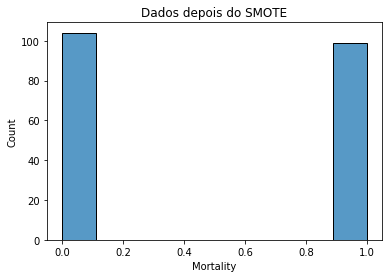

In [ ]:
sns.histplot(x=y_train)
plt.title('Dados depois do SMOTE')
plt.show()

# Modelos de Classificação

### Random Forest

In [ ]:
forest =  RandomForestClassifier(random_state=42)

params = {
    'n_estimators':[50,70,80,100,200,300],
    'max_depth':[2,3,4,5,6,7,8],
    'max_features':[2,3,4]
}

grid_search = GridSearchCV(estimator=forest, param_grid=params, cv=3, n_jobs=-1)

grid_search.fit(x_train, y_train)

grid_search.best_params_

{'max_depth': 7, 'max_features': 4, 'n_estimators': 50}

In [ ]:
forest =  RandomForestClassifier(max_depth=7, n_estimators=50, max_features=4, random_state=42)
forest.fit(x_train, y_train)

y_pred_tf = forest.predict(x_train)
y_pred_f = forest.predict(x_test)

print('Train Score:', forest.score(x_train, y_train))
print('Test Score:',forest.score(x_test, y_test))

Train Score: 0.9802955665024631
Test Score: 0.8823529411764706


In [ ]:
cm_forest = confusion_matrix(y_test, forest.predict(x_test))
cm_norm_forest = cm_forest / cm_forest.sum(axis=1)
cm_norm_forest

array([[0.91304348, 0.07142857],
       [0.17391304, 0.85714286]])

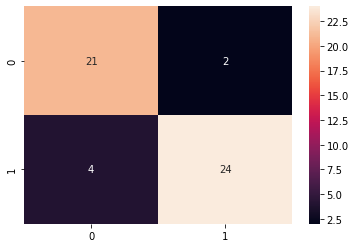

In [ ]:
## Visualizando os acertos do modelo na Matrix
sns.heatmap(cm_forest, annot=True)

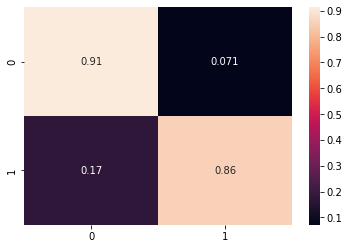

In [ ]:
## Visualizando os acertos em porcentagem na Matrix
sns.heatmap(cm_norm_forest, annot=True)

### Extra Trees

In [ ]:
extra = ExtraTreesClassifier(random_state=42)
params = {
    'n_estimators':[50,70,80,100,200,300],
    'max_depth':[2,3,4,5,6,7,8],
    'max_features':[2,3,4]
}

grid_search = GridSearchCV(estimator=extra, param_grid=params, cv=3, n_jobs=-1)

grid_search.fit(x_train, y_train)

grid_search.best_params_

{'max_depth': 8, 'max_features': 4, 'n_estimators': 300}

In [ ]:
extra = ExtraTreesClassifier(max_depth=8, n_estimators=300, max_features=4, random_state=42)
extra.fit(x_train, y_train)

y_pred_te = extra.predict(x_train)
y_pred_f = extra.predict(x_test)

print('Train Score:', extra.score(x_train, y_train))
print('Test Score:',extra.score(x_test, y_test))

Train Score: 0.9901477832512315
Test Score: 0.9019607843137255


In [ ]:
cm_extra = confusion_matrix(y_test, extra.predict(x_test))
cm_norm_extra = cm_extra / cm_extra.sum(axis=1)
cm_norm_extra

array([[0.91304348, 0.07142857],
       [0.13043478, 0.89285714]])

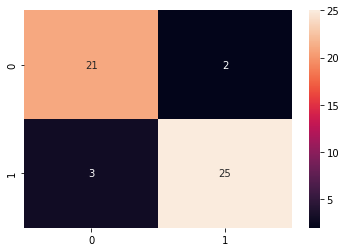

In [ ]:
# Visualizando os acertos do modelo na Matrix
sns.heatmap(cm_extra, annot=True)

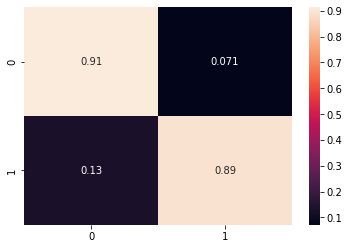

In [ ]:
# Visualizando os acertos em porcentagem na Matrix
sns.heatmap(cm_norm_extra, annot=True)

### Gradient Boosting

In [ ]:
grade = GradientBoostingClassifier(random_state=42)
params = {
    'n_estimators':[50,70,80,100,200,300],
    'max_depth':[2,3,4,5,6,7,8],
    'max_features':[2,3,4]
}

grid_search = GridSearchCV(estimator=grade, param_grid=params, cv=3, n_jobs=-1)

grid_search.fit(x_train, y_train)

grid_search.best_params_

{'max_depth': 7, 'max_features': 4, 'n_estimators': 200}

In [ ]:
grade = GradientBoostingClassifier(max_depth=7, n_estimators=200, max_features=4, random_state=42)
grade.fit(x_train, y_train)

y_pred_tg = grade.predict(x_train)
y_pred_g = grade.predict(x_test)

print('Train Score:', grade.score(x_train, y_train))
print('Test Score:',grade.score(x_test, y_test))

Train Score: 1.0
Test Score: 0.9803921568627451


In [ ]:
cm_grade = confusion_matrix(y_test, grade.predict(x_test))
cm_norm_grade = cm_grade / cm_grade.sum(axis=1)
cm_norm_grade

array([[0.95652174, 0.03571429],
       [0.        , 1.        ]])

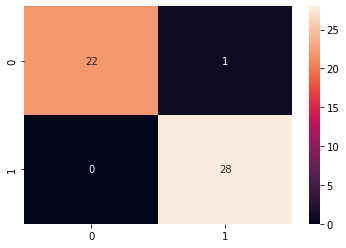

In [ ]:
# Visualizando os acertos do modelo na Matrix
sns.heatmap(cm_grade, annot=True)

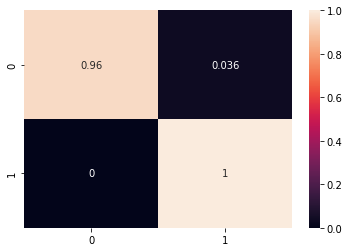

In [ ]:
##  Visualizando os acertos em porcentagem na Matrix
sns.heatmap(cm_norm_grade, annot=True)

# Conjunto de dados novo com a previsão

### Criando um dataframe com os conjuntos de treino e teste

In [ ]:
# criando tabela com o conjunto de treino
new = pd.DataFrame(x_train, columns=x.columns)
new['Mortality'] = y_train.values
new['level'] = 'Dados Existem'
new['Predictions'] = y_pred_tg

# criando tabela com o conjunto de teste
new1 = pd.DataFrame(x_test, columns=x.columns)
new1['Mortality'] = y_test
new1['level'] = 'Dados Novos'
new1['Predictions'] = y_pred_g

# juntando os novos conjuntos de dados
final = pd.concat([new, new1], ignore_index=True)

print(new.shape)
print(new1.shape)
print(final.shape)

(203, 157)
(51, 157)
(254, 157)


In [ ]:
final.head()

,Age,Gender,Locality,Marital status,Life.Style,Sleep,Category,Depression,Hyperlipi,Smoking,...,SK.React_0,SK.React_body.pain,SK.React_cough.bleeding,SK.React_lungs,SK.React_nausea.temp,SK.React_skin.bleeding,SK.React_stomach.bleeding,Mortality,level,Predictions
0,0.608696,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Dados Existem,0
1,0.500000,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Dados Existem,1
2,0.782609,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Dados Existem,0
3,0.695652,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Dados Existem,0
4,0.826087,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Dados Existem,1


### Mesclagem

In [ ]:
new_data = dados.merge(final[['level','Predictions']], left_index=True, right_index=True)
new_data.head()

,Age,Age.Group,Gender,Locality,Marital status,Life.Style,Sleep,Category,Depression,Hyperlipi,...,ca,thal,num,SK,SK.React,Reaction,Mortality,Follow.Up,level,Predictions
0,45,41-50,Female,RURAL,MARRIED,NO,NO,FREE,YES,YES,...,0,7,2,1,NO,0,0,60,Dados Existem,0
1,51,51-60,Female,URBAN,MARRIED,NO,NO,FREE,YES,YES,...,0,7,2,1,NO,0,0,15,Dados Existem,1
2,55,51-60,Female,RURAL,MARRIED,YES,YES,FREE,YES,YES,...,0,3,2,1,NO,0,0,6,Dados Existem,0
3,55,51-60,Female,RURAL,MARRIED,YES,YES,FREE,YES,YES,...,1,7,3,1,NO,0,0,52,Dados Existem,0
4,56,51-60,Female,RURAL,MARRIED,YES,NO,FREE,YES,YES,...,2,7,3,1,NO,0,0,34,Dados Existem,1


In [ ]:
print(dados.shape)
print(new_data.shape)

(154, 60)
(154, 62)


### Salvando em csv o novo conjunto de dados

In [ ]:
new_data.to_csv('Previsao_Doenca_Cardiaca', index=True)